<img src="https://www.insidehighered.com/sites/default/server_files/media/california_0.jpg">
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory

Acknowledgements:
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
CA_url="https://raw.githubusercontent.com/csbfx/advpy122-data/master/California_housing.csv"

ca = pd.read_csv(CA_url)
ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Q1: show the number of missing data in each column of the dataframe

In [3]:
print(ca.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


### Q2: show the data type for each column of the dataframe

In [4]:
print(ca.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


### Q3: Plot a regression line and confidence interval 
Create a lmplot that shows the linear regression between `median_income` and `median_house_value`. Only use data with `median_housing_value` < 500000. Include a meaningful title for the plot.

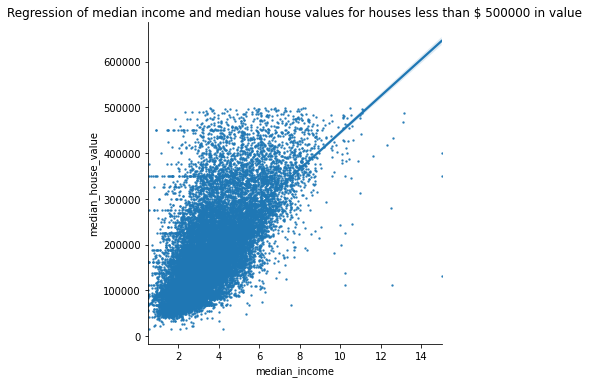

In [5]:
sns.lmplot(data= ca[ca["median_house_value"] < 500000], x = "median_income", y = "median_house_value",scatter_kws={'s':2})
plt.title("Regression of median income and median house values for houses less than $ 500000 in value");

### Q4: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

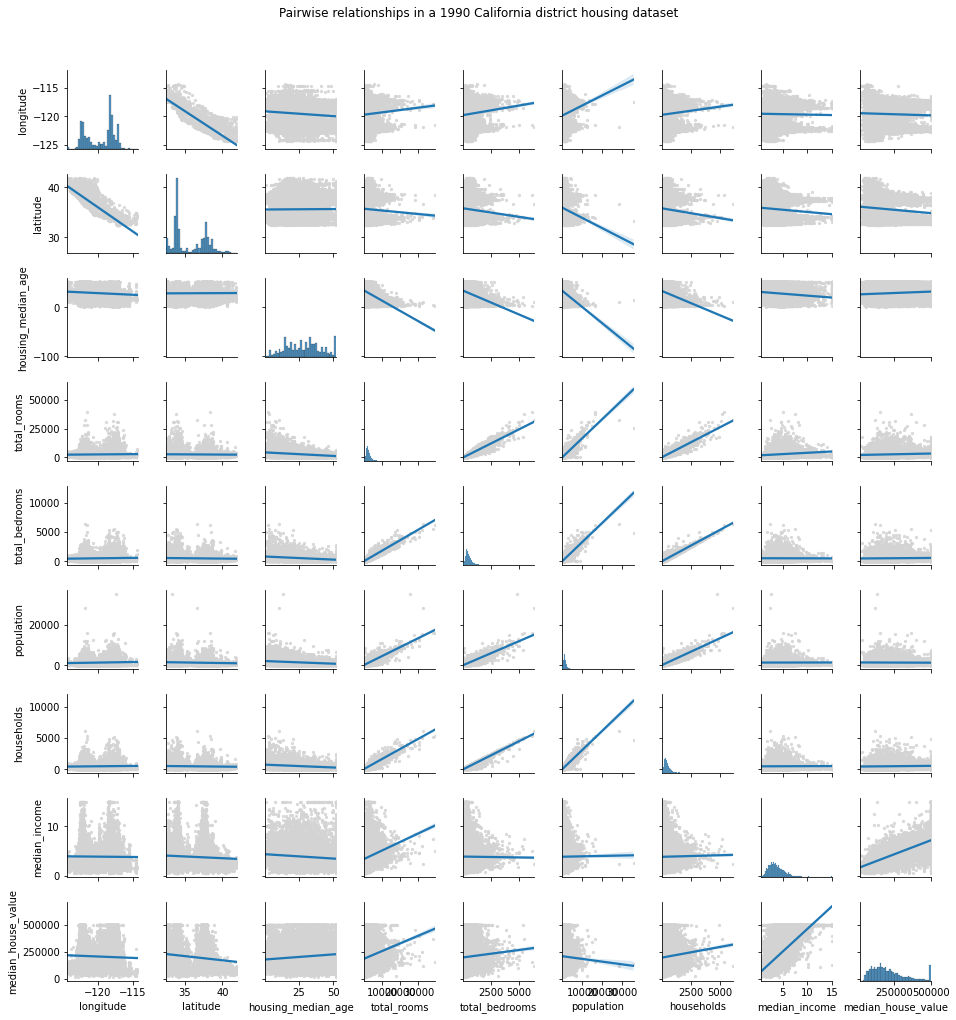

In [6]:
g = sns.pairplot(data= ca, height= 1.5, kind="reg", plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}},)
g.fig.suptitle( "Pairwise relationships in a 1990 California district housing dataset", y=1.05);

### Q5. Create a relplot that shows the `median_income` and `median_house` along with the `longitude` and `latitude`. 
Plot `longitude` along the x-axis and `latitude` along the y-axis. Use `hue` to display the `median_house_value` and the size of the data point `median_income`. Include a meaningful title to the plot. 

Text(0.5, 1.5, 'Relationship between houses based on values and income to their geographical location')

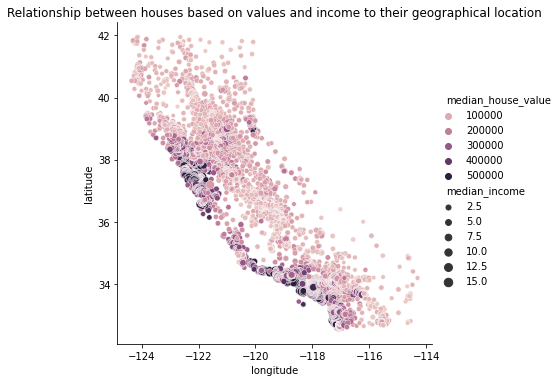

In [7]:
sns.relplot(data = ca, x= "longitude", y= "latitude", hue= "median_house_value", size= "median_income")
plt.title("Relationship between houses based on values and income to their geographical location", y = 1.5)

### Q6: Create a plot with small multiples plots
The small multiple plots should show the relationship between `median_house_value` vs `median_income` using `ocean_proximity` as the single category. Only use data with `median_house_value` < 500000. Organize the multiple plots to have 2 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

Text(0.5, 1.5, 'Relationship between houses based on values and income to their ocean proximity')

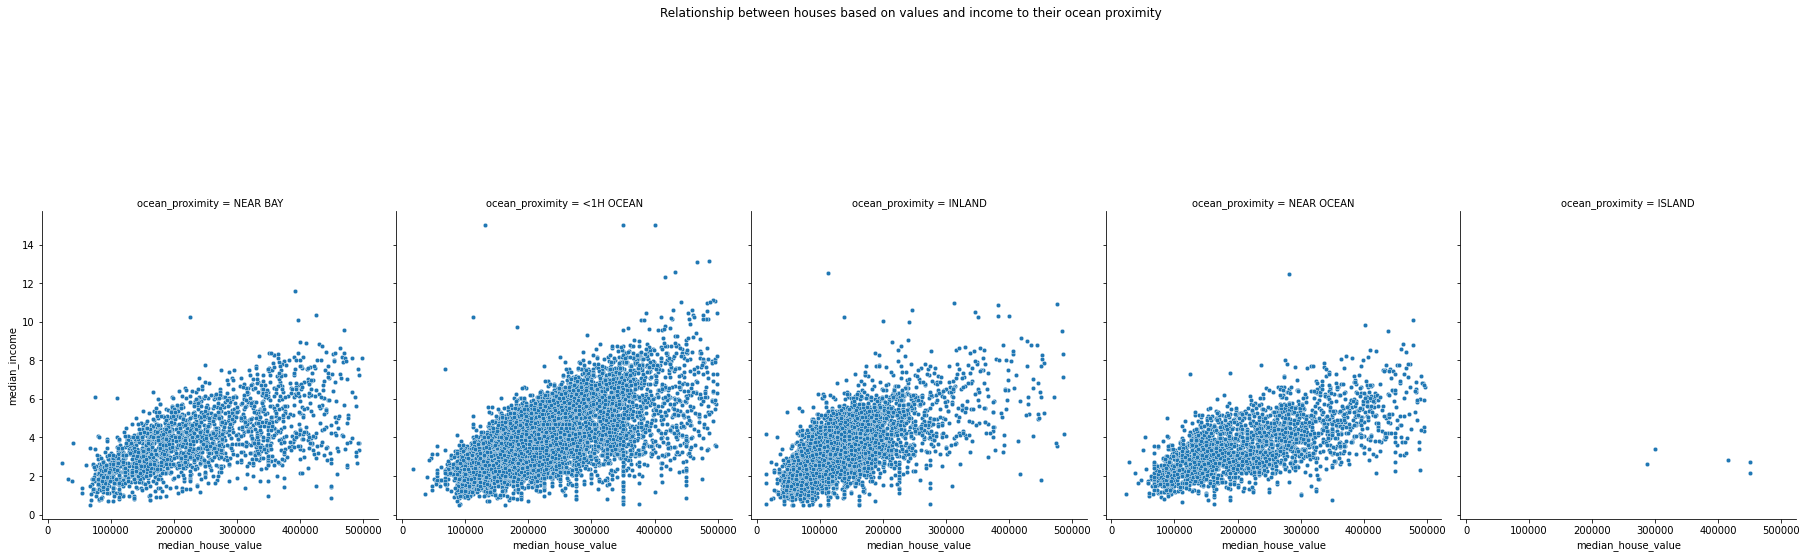

In [8]:
g = sns.relplot(data = ca[ca["median_house_value"] < 500000], x="median_house_value", y= "median_income",col = "ocean_proximity",height= 5, s= 20)
g.fig.suptitle("Relationship between houses based on values and income to their ocean proximity", y = 1.5)